In [1]:
import env
import pandas as pd
import pydataset as data
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
df_iris = sns.load_dataset('iris')
type(df_iris)

#### Print the first three rows.

In [ ]:
df_iris.head(3)

#### Print the number of rows and columns (shape)

In [ ]:
df_iris.shape

#### Print the column names

In [ ]:
df_iris.columns

#### Print the data type of each column

In [ ]:
df_iris.dtypes

#### Print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris.describe()

### 5. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [2]:
df_excel = pd.read_excel('Excel_Exercises.xlsx')

In [ ]:
type(df_excel)

#### Assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

#### Print the number of rows of your original dataframe

In [ ]:
len(df_excel)

#### Print the first 5 column names

In [ ]:
df_excel.columns[:5]

#### Print the column names that have a data type of object

In [ ]:
df_excel.dtypes

In [ ]:
df_excel.select_dtypes(include='object').columns

#### Compute the range for each of the numeric variables.

In [3]:
range = df_excel.select_dtypes(exclude='object').max() - df_excel.select_dtypes(exclude='object').min()

In [4]:
range

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
Unnamed: 12             NaN
Unnamed: 13             NaN
dtype: float64

### 6. Read the data from this google sheet into a dataframe, df_google

In [5]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

#### Print the first 3 rows

In [ ]:
df_google.head(3)

#### Print the number of rows and columns

In [ ]:
df_google.shape

#### Print the column names

In [ ]:
df_google.columns

#### Print the data type of each column

In [ ]:
df_google.dtypes

#### Print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe()

#### Print the unique values for each of your categorical variables

In [6]:
df_google_objects = df_google.select_dtypes(include='object')
df_google_objects

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [7]:
for col in df_google_objects.columns:
    if df_google_objects[col].dtypes == 'object':
        print(f'{col} has {df_google_objects[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

import env

from scipy import stats
import seaborn as sns

## Data Prep Exercises

### Using the Iris Data:

#### 1. Use the function defined in acquire.py to load the iris data.
#### 2. Drop the species_id and measurement_id columns.
#### 3. Rename the species_name column to just species.
#### 4. Create dummy variables of the species name and concatenate onto the iris dataframe.
#### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.
___________________________________________________________________________________________________
- - - - - - - -

#### 1. Use the function defined in acquire.py to load the iris data.

In [ ]:
iris_df = acquire.get_iris_data()

In [ ]:
iris_df.info()

#### 2. Drop the species_id and measurement_id columns

In [ ]:

# Drop columns with too many missing values for now and reassign; check the shape of my data.
cols_to_drop = ['species_id']
iris_df = iris_df.drop(columns=cols_to_drop)


In [ ]:
iris_df.shape

In [ ]:
iris_df.head()

#### 3. Rename the species_name column to just species.

In [ ]:
iris_df.rename(columns={'species_name': 'species'}, inplace=True)

In [ ]:
iris_df.head()

#### 4. Create dummy variables of the species name and concatenate onto the iris dataframe.



In [ ]:
dummy_species = pd.get_dummies(iris_df['species'], dummy_na=False, drop_first=[True, True])

In [ ]:
dummy_species

In [ ]:
iris_df = pd.concat([iris_df, dummy_species], axis=1)

In [ ]:
iris_df.head()

#### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    cols_to_drop = ['species_id']
    iris_df = df.drop(columns=cols_to_drop)
    iris_df.rename(columns={'species_name': 'species'}, inplace=True)
    dummy_species = pd.get_dummies(iris_df['species'], dummy_na=False, drop_first=[True, True])
    iris_df = pd.concat([iris_df, dummy_species], axis=1)
    return iris_df

In [ ]:
prep_iris(iris_df)

### Using the Titanic dataset

#### 1. Use the function defined in acquire.py to load the Titanic data.

In [ ]:
titanic_df = acquire.get_titanic_data()

In [ ]:
titanic_df.head()

In [ ]:
titanic_df.info()

#### 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
titanic_df = titanic_df.drop_duplicates()
titanic_df = titanic_df.drop(columns=['age','deck', 'embarked'])

In [ ]:
titanic_df.info()

In [ ]:
titanic_df['embark_town'] = titanic_df['embark_town'].fillna(value='Southampton')

In [ ]:
titanic_df.info()

#### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
dummy_df = pd.get_dummies(titanic_df[['sex','class','embark_town']],dummy_na=False, drop_first=[True,True,True])

In [ ]:
dummy_df

In [ ]:
titanic_df = pd.concat([titanic_df,dummy_df],axis=1)
titanic_df.head()

#### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic(df):
    titanic_df = df.drop_duplicates()
    titanic_df = titanic_df.drop(columns=['age','deck', 'embarked'])
    titanic_df['embark_town'] = titanic_df['embark_town'].fillna(value='Southampton')
    dummy_df = pd.get_dummies(titanic_df[['sex','class','embark_town']],dummy_na=False, drop_first=[True,True])
    titanic_df = pd.concat([titanic_df,dummy_df],axis=1)
    return titanic_df

In [ ]:
titanic_df.head()

In [ ]:
prep_titanic(titanic_df).head()

### Using the Telco dataset

#### 1. Use the function defined in acquire.py to load the Telco data.

In [89]:
telco_df = acquire.get_telco_data()

In [90]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

#### 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
telco_df.head()

In [ ]:
telco_df = telco_df.drop(columns = ['payment_type_id','internet_service_type_id','contract_type_id','customer_id'])

In [ ]:
telco_df.info()

#### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
dummy_df = pd.get_dummies(telco_df[['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']],dummy_na=False, drop_first=[True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True])

In [ ]:
telco_df = pd.concat([telco_df, dummy_df], axis=1)

In [88]:
telco_df.head()

NameError: name 'telco_df' is not defined

#### 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [91]:
def prep_telco(df):
        telco_df = df.drop(columns = ['payment_type_id','internet_service_type_id','contract_type_id','customer_id'])
        dummy_df = pd.get_dummies(telco_df[['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']],dummy_na=False, drop_first=[True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True])
        telco_df = pd.concat([telco_df, dummy_df], axis=1)
        return telco_df

In [92]:
prep_telco(telco_df).head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,...,1,1,0,0,1,0,0,0,0,1
1,Male,0,No,No,54,No,No phone service,Yes,No,No,...,0,0,0,0,1,0,0,1,0,0
2,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,...,0,1,0,0,1,0,0,1,0,0
4,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,...,1,1,0,0,1,0,0,0,0,0


### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data.

In [4]:
def prep_iris(df):
    cols_to_drop = ['species_id']
    iris_df = df.drop(columns=cols_to_drop)
    iris_df.rename(columns={'species_name': 'species'}, inplace=True)
    dummy_species = pd.get_dummies(iris_df['species'], dummy_na=False, drop_first=[True, True])
    iris_df = pd.concat([iris_df, dummy_species], axis=1)
    return iris_df

In [2]:
iris_df = acquire.get_iris_data()

In [5]:
prep_iris(iris_df)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,0,1
146,virginica,6.3,2.5,5.0,1.9,0,1
147,virginica,6.5,3.0,5.2,2.0,0,1
148,virginica,6.2,3.4,5.4,2.3,0,1


In [6]:
iris_df = prep_iris(iris_df)

In [7]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   versicolor    150 non-null    uint8  
 6   virginica     150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 7.3+ KB


In [9]:
train, test = train_test_split(iris_df, test_size = .2, random_state=123)

In [12]:
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [19]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (84, 7)
Validate: (36, 7)
Test: (30, 7)


### 2.  Univariate Stats

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

* For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

* Document takeaways & any actions.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 56 to 113
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   versicolor    84 non-null     uint8  
 6   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [32]:
train.species.value_counts()

versicolor    31
virginica     27
setosa        26
Name: species, dtype: int64

In [ ]:
print(train.describe())
print(validate.describe())
print(test.describe())

In [17]:
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]

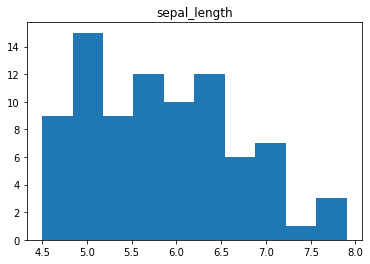

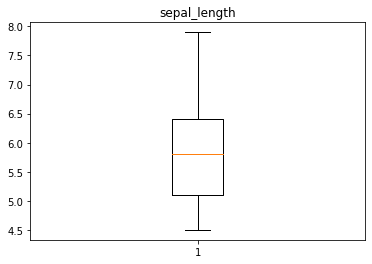

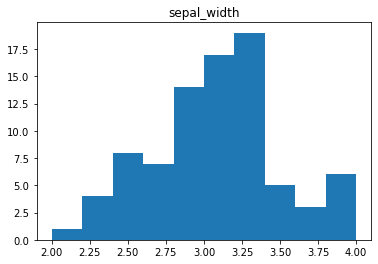

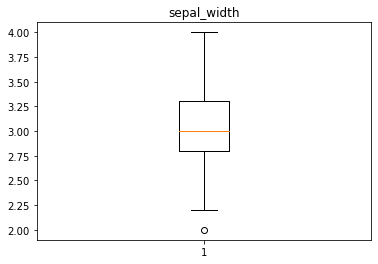

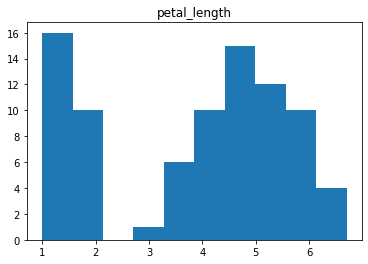

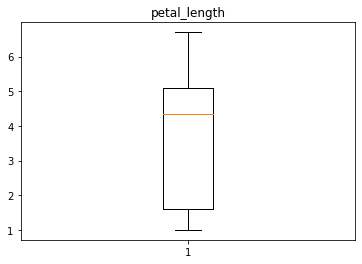

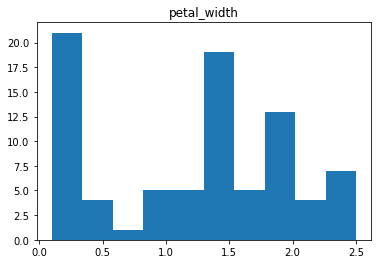

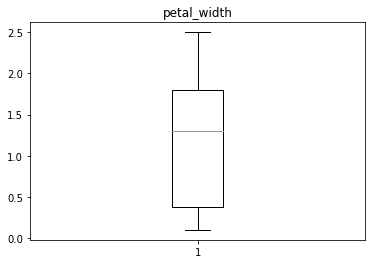

In [18]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [20]:
obj_cols = train.columns[[train[col].dtype == 'O' for col in train.columns]]

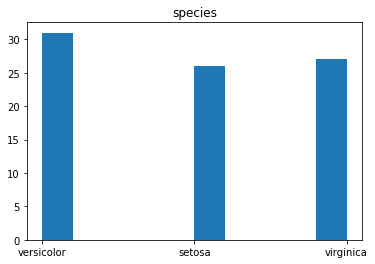

In [23]:
for col in obj_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

#### Takeaways & Actions

* There is about an equal number of each species of plant.
* Sepal length seems to have two normal distributions within the same diagram.
* Sepal width seems to be normally distributed.
* There are two normally dsitributed curves in petal length.
* Petal width would have two normally distributed curves if the outliers were removed.

### 3. Bivariate Stats

* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

* For each measurement type, compute the descriptive statistics for each species.

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

* Document takeaways & any actions.

### Question before exploring the data:
#### Do the different species have distinct sepal/petal length and width?

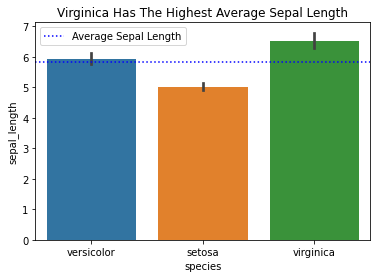

In [49]:
plt.title("Virginica Has The Highest Average Sepal Length")
sns.barplot(x="species", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Average Sepal Length", color='blue', linestyle='dotted')
plt.legend()
plt.show()

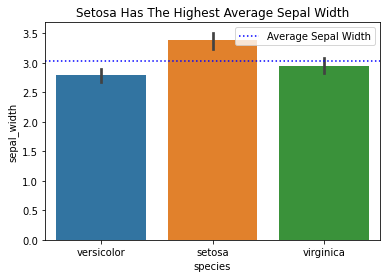

In [51]:
plt.title("Setosa Has The Highest Average Sepal Width")
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Average Sepal Width", color='blue', linestyle='dotted')
plt.legend()
plt.show()

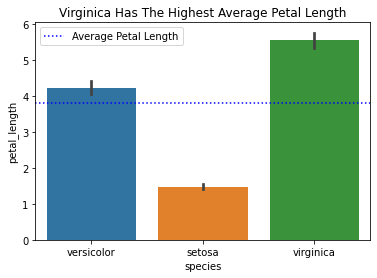

In [48]:
plt.title("Virginica Has The Highest Average Petal Length")
sns.barplot(x="species", y="petal_length", data=train)
avg_petal_length = train.petal_length.mean()
plt.axhline(avg_petal_length, label="Average Petal Length", color='blue',linestyle='dotted')
plt.legend()
plt.show()

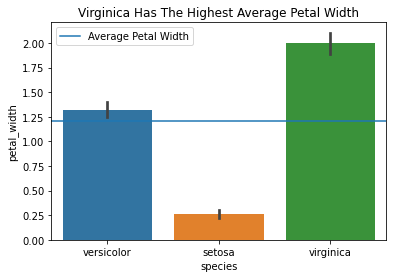

In [52]:
plt.title("Virginica Has The Highest Average Petal Width")
sns.barplot(x="species", y="petal_width", data=train)
avg_petal_width = train.petal_width.mean()
plt.axhline(avg_petal_width, label="Average Petal Width")
plt.legend()
plt.show()

In [58]:
versicolor_describe_sepal_length = pd.DataFrame(train[train.species == 'versicolor'].sepal_length).describe()
versicolor_describe_sepal_width = pd.DataFrame(train[train.species == 'versicolor'].sepal_width).describe()
versicolor_describe_petal_length = pd.DataFrame(train[train.species == 'versicolor'].petal_length).describe()
versicolor_describe_petal_width = pd.DataFrame(train[train.species == 'versicolor'].petal_width).describe()

In [65]:
versicolor_describe = pd.concat([versicolor_describe_sepal_length, versicolor_describe_sepal_width], axis = 1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_petal_length], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_petal_width], axis=1)

In [66]:
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,31.000000,31.000000,31.000000,31.000000
mean,5.938710,2.787097,4.232258,1.322581
std,0.531462,0.336395,0.505560,0.210887
min,4.900000,2.000000,3.000000,1.000000
25%,5.550000,2.550000,4.000000,1.200000
50%,5.900000,2.800000,4.300000,1.300000
75%,6.250000,3.000000,4.550000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [67]:
setosa_describe_sepal_length = pd.DataFrame(train[train.species == 'setosa'].sepal_length).describe()
setosa_describe_sepal_width = pd.DataFrame(train[train.species == 'setosa'].sepal_width).describe()
setosa_describe_petal_length = pd.DataFrame(train[train.species == 'setosa'].petal_length).describe()
setosa_describe_petal_width = pd.DataFrame(train[train.species == 'setosa'].petal_width).describe()

setosa_describe = pd.concat([setosa_describe_sepal_length, setosa_describe_sepal_width], axis = 1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_petal_length], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_petal_width], axis=1)

In [68]:
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,26.000000,26.000000,26.000000,26.000000
mean,5.011538,3.396154,1.480769,0.261538
std,0.326591,0.364945,0.191873,0.116883
min,4.500000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.450000,1.500000,0.200000
75%,5.100000,3.675000,1.600000,0.300000
max,5.800000,4.000000,1.900000,0.600000


In [69]:
virginica_describe_sepal_length = pd.DataFrame(train[train.species == 'virginica'].sepal_length).describe()
virginica_describe_sepal_width = pd.DataFrame(train[train.species == 'virginica'].sepal_width).describe()
virginica_describe_petal_length = pd.DataFrame(train[train.species == 'virginica'].petal_length).describe()
virginica_describe_petal_width = pd.DataFrame(train[train.species == 'virginica'].petal_width).describe()

virginica_describe = pd.concat([virginica_describe_sepal_length, virginica_describe_sepal_width], axis = 1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_petal_length], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_petal_width], axis=1)

In [70]:
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,27.000000,27.000000,27.000000,27.000000
mean,6.529630,2.951852,5.551852,2.000000
std,0.700996,0.340102,0.558411,0.292206
min,4.900000,2.200000,4.500000,1.400000
25%,6.050000,2.750000,5.100000,1.800000
50%,6.400000,3.000000,5.600000,2.000000
75%,7.000000,3.200000,5.900000,2.200000
max,7.900000,3.800000,6.700000,2.500000


#### * For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.


In [75]:
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']
virginica = train[train.species == 'virginica']

In [79]:
t,p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative='greater')

In [82]:
t, p

(812.5, 3.688979419080088e-10)

In [83]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
630.0 0.0004942698168315015
------------------


Comparing sepal_width between virginica and versicolor
527.0 0.0453504274899544
------------------


Comparing petal_length between virginica and versicolor
817.5 2.425293616303908e-10
------------------


Comparing petal_width between virginica and versicolor
812.5 3.688979419080088e-10
------------------




### Takeaways

* Setosas have wide, but short sepals.
* Virginica has the longest and widest petals.
* Could area be a good classification feature?

### 4. Multivariate Stats

* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

* Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

* Document takeaways and any actions.

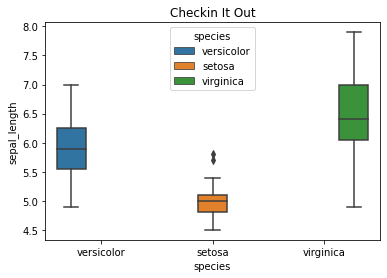

In [85]:
# Let's visualize a multivariate analysis
plt.title("Checkin It Out")
sns.boxplot(x="species", y="sepal_length", data=train, hue="species")
plt.show()